In [0]:
import keras
from keras.applications import VGG16
from keras.models import Sequential, load_model, model_from_json
from keras import models, optimizers, layers
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split  
from PIL import Image 
from keras.preprocessing import image as images
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import backend as K 
import os
import numpy as np  
import glob  
import pandas as pd
import cv2
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/gdrive')
%cd ./gdrive/'My Drive'/"Colab Notebooks"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [0]:
num_classes = 2
folder = ["Class1","Class1_def"]                                     
image_size = 224
x = []
y = []

for index, name in enumerate(folder):
    dir = "./DAGM/" + name
    files = glob.glob(dir + "/*.png")    
    for file in tqdm(files):
        image = Image.open(file)                       
        image = image.convert("RGB")    
        image = image.resize((image_size, image_size))
        data = np.asarray(image)        
        x.append(data)  
        y.append(index) 

x = np.array(x)   
y = np.array(y)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ｙ　ラベルをワンホット表現に
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

100%|██████████| 150/150 [01:15<00:00,  2.18it/s]


920 train samples
230 test samples


In [0]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
last = vgg_conv.output

mod = Flatten()(last)
mod = Dense(1024, activation='relu')(mod)
mod = Dropout(0.5)(mod)
preds = Dense(2, activation='sigmoid')(mod)

model = models.Model(vgg_conv.input, preds)
model.summary()

epochs = 100
batch_size = 48

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

W0824 01:27:32.493219 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 01:27:32.536843 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 01:27:32.545972 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 01:27:32.585479 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 4s 0us/step


W0824 01:27:37.495368 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0824 01:27:37.496433 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0824 01:27:40.460539 139737533921152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0824 01:27:40.505312 139737533921152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)
model.save('my_model.h5')

Train on 920 samples, validate on 230 samples
Epoch 1/100
920/920 [==============================] - 30s 33ms/step - loss: 0.5682 - acc: 0.7750 - val_loss: 0.4522 - val_acc: 0.8696
Epoch 2/100
920/920 [==============================] - 13s 14ms/step - loss: 0.4256 - acc: 0.8652 - val_loss: 0.3859 - val_acc: 0.8696
Epoch 3/100
920/920 [==============================] - 13s 14ms/step - loss: 0.4133 - acc: 0.8690 - val_loss: 0.3896 - val_acc: 0.8696
Epoch 4/100
920/920 [==============================] - 13s 14ms/step - loss: 0.4070 - acc: 0.8696 - val_loss: 0.3855 - val_acc: 0.8696
Epoch 5/100
920/920 [==============================] - 13s 14ms/step - loss: 0.4092 - acc: 0.8679 - val_loss: 0.3862 - val_acc: 0.8696
Epoch 6/100
920/920 [==============================] - 13s 14ms/step - loss: 0.4043 - acc: 0.8696 - val_loss: 0.3859 - val_acc: 0.8696
Epoch 7/100
920/920 [==============================] - 13s 14ms/step - loss: 0.4031 - acc: 0.8696 - val_loss: 0.3848 - val_acc: 0.8696
Epoch 8/1

In [0]:
from keras.models import load_model

model = load_model('my_model.h5')

W0824 10:10:45.201016 140363078494080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 10:10:45.253583 140363078494080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 10:10:45.293186 140363078494080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0824 10:10:45.426177 140363078494080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 10:10:45.427205 140363078494080 deprecation_wrap

230/230 [==============================] - 5s 21ms/step
Test loss: 0.026461015821626896
Test accuracy: 0.9956521739130435


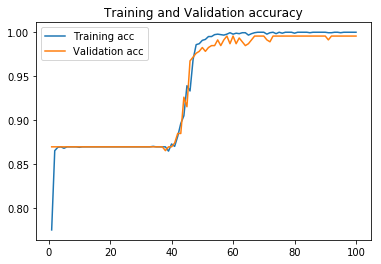

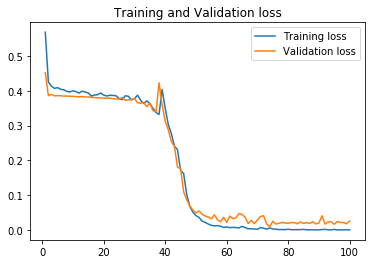

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Plot accuracy & loss
import matplotlib.pyplot as plt 

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, label = "Training acc" )
plt.plot(epochs, val_acc, label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss,  label = "Training loss" )
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [0]:
model.save_weights('grad_vgg16_weight_DAGM_C1.h5')

In [0]:
K.set_learning_phase(1) #set learning phase

def Grad_Cam(input_model, pic_array, layer_name):

    # 前処理
    pic = np.expand_dims(pic_array, axis=0)
    pic = pic.astype('float32')
    preprocessed_input = pic / 255.0

    # 予測クラスの算出
    predictions = input_model.predict(preprocessed_input)
    class_idx = np.argmax(predictions[0])
    class_output = input_model.output[:, class_idx]

    #  勾配を取得
    conv_output = input_model.get_layer(layer_name).output   # layer_nameのレイヤーのアウトプット
    grads = K.gradients(class_output, conv_output)[0]  # gradients(loss, variables) で、variablesのlossに関しての勾配を返す
    gradient_function = K.function([input_model.input], [conv_output, grads])  # input_model.inputを入力すると、conv_outputとgradsを出力する関数

    output, grads_val = gradient_function([preprocessed_input])
    output, grads_val = output[0], grads_val[0]

    # 重みを平均化して、レイヤーのアウトプットに乗じる
    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    # 画像化してヒートマップにして合成
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR) 
    cam = np.maximum(cam, 0) 
    cam = cam / cam.max()

    jetcam = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)  # モノクロ画像に疑似的に色をつける
    jetcam = cv2.cvtColor(jetcam, cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    jetcam = (np.float32(jetcam) + pic / 2)   # もとの画像に合成
    return jetcam

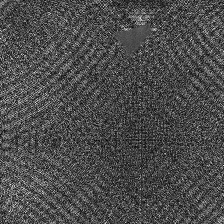

In [0]:
pic_array = img_to_array(load_img('DAGM/Class1_def/12.png', target_size=(224, 224)))
pic = pic_array.reshape((1,) + pic_array.shape)
array_to_img(pic_array)



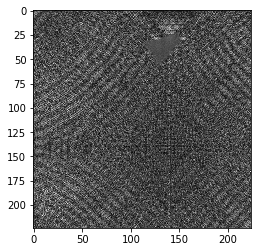

In [0]:
import matplotlib.pyplot as plt

plt.imshow(array_to_img(pic_array))
plt.show()

In [0]:
pic.shape

(1, 224, 224, 3)

In [0]:
load_img('DAGM/Class1_def/12.png', target_size=(224, 224))

AttributeError: ignored

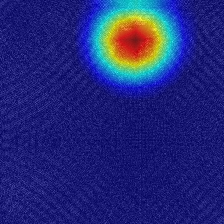

In [0]:
picture = Grad_Cam(model, pic_array, 'block5_conv3')
picture = picture[0,:,:,]
array_to_img(picture)